# Image Processing and Computer Vision

<h3>Image I/O and display with Python</h3>

Images are stored as files on the disk, so reading and writing images from the files are disk I/O operations. These can be done using many ways using different libraries; some of them are shown in this section. Let us first start by importing all of the required packages:

In [32]:
# for inline image display inside notebook
# % matplotlib inline
import numpy as np
import cv2 as opencv
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc

<h2> 1. Reading, saving, and displaying an image using PIL </h2>

The PIL function, <b> <i> open()</i></b>, reads an image from disk in an Image object, as shown in the following code. The image is loaded as an object of the <b><i> PIL.PngImagePlugin.PngImageFile</i></b> class, and we can use properties such as the width, height, and mode to find the size.

In [33]:
im = Image.open("E:/Courses/Image-processing-1/images-1/parrot.png") # read the image, provide the correct path
print(im.width, im.height, im.mode, im.format, type(im))
im.show() # display the image

820 503 RGB JPEG <class 'PIL.JpegImagePlugin.JpegImageFile'>


The following code block shows how to use the PIL function, <b><i>convert()</i></b>, to convert the colored <b>RGB</b> image into a <b>grayscale</b> image:

In [34]:
im_g = im.convert('L') # convert the RGB color image to a grayscale image
im_g.save('E:/Courses/Image-processing-1/images-1/parrot_gray.png') # save the image to disk
im2 = Image.open("E:/Courses/Image-processing-1/images-1/parrot_gray.png")
im2.show() # read the grayscale image from disk and show

<h3>2. Reading, saving, and displaying an image using Matplotlib </h3>

The next code block shows how to use the <b><i>imread()</i></b> function from <b><i>matplotlib.image</i></b> to read an image in a <b><i>floating-point numpy ndarray</i></b>. The pixel values are represented as real values between 0 and 1:

[0.3647059  0.5019608  0.62352943 1.        ]
(483, 1050, 4) float32 <class 'numpy.ndarray'>


(-0.5, 1049.5, 482.5, -0.5)

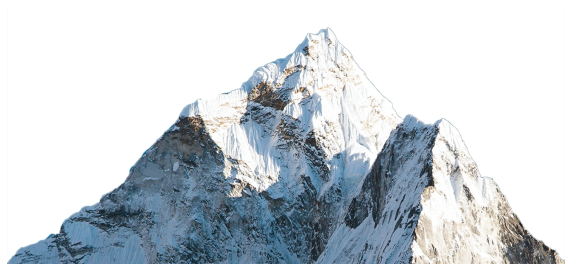

In [60]:
im = mpimg.imread("E:\Courses\Image-processing-1\images-1\hill.png") # read the image from disk as a numpy ndarray
print(im[480,150,...])
print(im.shape, im.dtype, type(im)) # this image contains an α channel, hence num_channels= 4
plt.figure(figsize=(10,10))
plt.imshow(im) # display the image
plt.axis('off')
#plt.show()

The next code snippet changes the image to a darker image by first setting all of the pixel values below 0.5 to 0 and then saving the <b><i> numpy ndarray</i></b> to disk. The saved image is again reloaded and displayed:

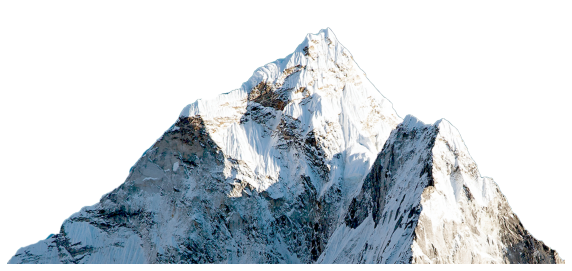

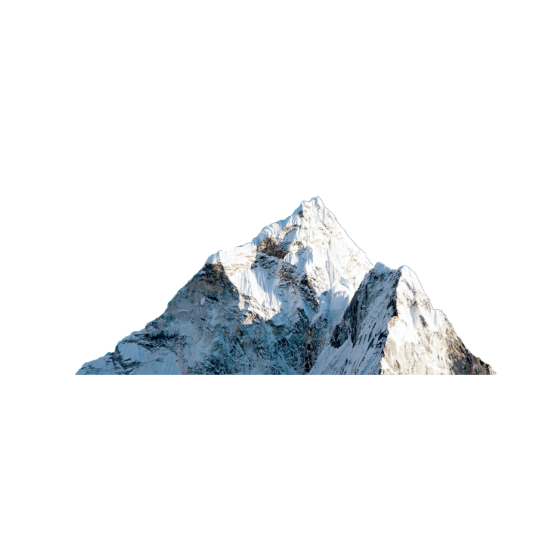

In [61]:
im1 = im
im1[im1 < 0.2] = 0 # make the image look darker
plt.figure(figsize=(10,10))
plt.imshow(im1)
plt.axis('off')
#plt.tight_layout()
plt.savefig("E:/Courses/Image-processing-1/images-1/hill_dark.png") # save the dark image
im = mpimg.imread("E:/Courses/Image-processing-1/images-1/hill_dark.png") # read the dark image
plt.figure(figsize=(10,10))
plt.imshow(im)
plt.axis('off') # no axis ticks
#plt.tight_layout()
plt.show()

<h3> 3. Reading, saving, and displaying an image using scikit-image </h3>

The next code block uses the <b><i>imread()</i></b> function from <b><i>scikit-image</i></b> to read an image in a <b><i>numpy ndarray</i></b> of type uint8 (8-bit unsigned integer). Hence, the pixel values will be in between 0 and 255. Then it converts  the colored RGB image into an HSV image using the <b><i>hsv2rgb()</i></b> function from the Image.color module. Next, it changes the saturation (colorfulness) to a constant value for all of the pixels by keeping the hue and value channels unchanged. The image is then converted back into RGB mode with the <b><i>rgb2hsv()</i></b> function to create a new image, which is then saved and displayed:

(368, 405, 3) uint8 <class 'numpy.ndarray'>


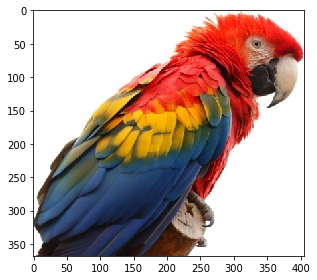

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


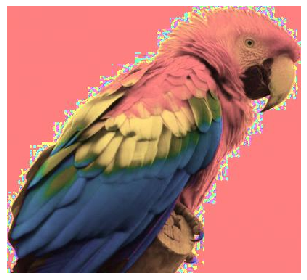

In [69]:
im = imread("E:\Courses\Image-processing-1\images-1\parrot2.jpg") # read image from disk, provide the correct path
print(im.shape, im.dtype, type(im))
imshow(im)
show()
# (362, 486, 3) uint8 <class 'numpy.ndarray'>
hsv = color.rgb2hsv(im) # from RGB to HSV color space
hsv[:, :, 1] = 0.5 # change the saturation
#hsv[:, :, 0] = 0
im1 = color.hsv2rgb(hsv) # from HSV back to RGB
imsave('E:\Courses\Image-processing-1\images-1\parrot_hsv.jpg', im1) # save image to disk
im = imread("E:\Courses\Image-processing-1\images-1\parrot_hsv.jpg")
plt.axis('off')
imshow(im)
show()

The following code block shows how we can load the <i>astronaut image</i> from the scikitimage library's image datasets with the data module. The module contains a few other popular datasets, such as cameraman, which can be loaded similarly:

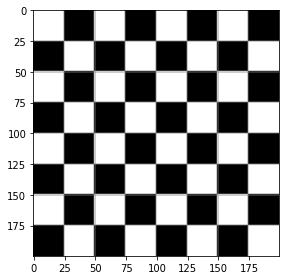

(<matplotlib.image.AxesImage at 0xd5804c6780>, None)

In [71]:
#im = data.astronaut()
im = data.checkerboard()
imshow(im), show()